In [5]:
# !pip install imbalanced-learn

In [6]:
# data: creditcard.csv
# location: https://mitu.co.in/dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [10]:
df.shape

(284807, 31)

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
x = df.drop(['Time','Class'], axis = 1)

y = df['Class']

In [14]:
import warnings
warnings.filterwarnings('ignore')

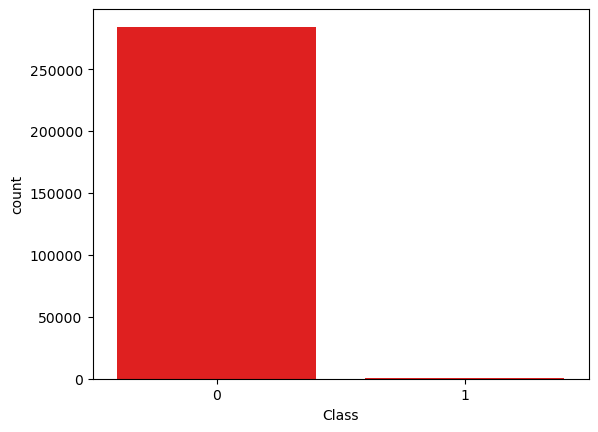

In [15]:
sns.countplot(x = y, color = 'r');

In [16]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## cross validation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.25,
                                                   random_state= 0)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier(random_state=0)

In [22]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
# evaluate

from sklearn.metrics import classification_report, accuracy_score

In [24]:
y_pred = dt.predict(x_test)

In [25]:
accuracy_score(y_test, y_pred)

0.9991713715906857

## Random under sampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_res, y_res = rus.fit_resample(x, y)

In [27]:
y_res.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

## Random Over Sampling

In [28]:
from imblearn.over_sampling import RandomOverSampler
rus = RandomOverSampler(random_state=0)
x_res, y_res = rus.fit_resample(x, y)

In [29]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

## SMOTE

In [31]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(random_state=0)
x_res, y_res = rus.fit_resample(x, y)

In [32]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res,
                                                   test_size=0.25,
                                                   random_state= 0)

In [34]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
y_pred = dt.predict(x_test)

In [36]:
accuracy_score(y_test, y_pred)

0.9982765655116138

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70856
           1       1.00      1.00      1.00     71302

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

